### Costa Rican Household Poverty Level Prediction

Here's the backstory: Many social programs have a hard time making sure the right people are given enough aid. It’s especially tricky when a program focuses on the poorest segment of the population. The world’s poorest typically can’t provide the necessary income and expense records to prove that they qualify.

In Latin America, one popular method uses an algorithm to verify income qualification. It’s called the Proxy Means Test (or PMT). With PMT, agencies use a model that considers a family’s observable household attributes like the material of their walls and ceiling, or the assets found in the home to classify them and predict their level of need.

While this is an improvement, accuracy remains a problem as the region’s population grows and poverty declines. So, here we are trying to identify which households have the highest need for social welfare assistance using different algorithms, the new algorithm could be implemented in other countries around the world.

#### Details of the competition can be found [here](https://www.kaggle.com/c/costa-rican-household-poverty-prediction)

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Displays all the columns of a dataframe
pd.set_option('display.max_columns',None)

### Data Preprocessing

In [2]:
# Importing training dataset
df = pd.read_csv('Train.csv')
df.head(10)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4
5,ID_ec05b1a7b,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,38,121,1444,16,121,4,1.777778,1.0,121.0,1444,4
6,ID_e9e0c1100,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,2,0.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,1,0,0,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,8,4,64,16,121,4,1.777778,1.0,121.0,64,4
7,ID_3e04e571e,130000.0,1,2,0,1,1,0,NaN,0,1,1,2,1,3,2,2,4,4,4,0,0.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0

In [3]:
# Total number of columns in the dataframe
print(len(df.columns))

143


In [4]:
print(df.count())

Id                 9557
v2a1               2697
hacdor             9557
rooms              9557
hacapo             9557
v14a               9557
refrig             9557
v18q               9557
v18q1              2215
r4h1               9557
r4h2               9557
r4h3               9557
r4m1               9557
r4m2               9557
r4m3               9557
r4t1               9557
r4t2               9557
r4t3               9557
tamhog             9557
tamviv             9557
escolari           9557
rez_esc            1629
hhsize             9557
paredblolad        9557
paredzocalo        9557
paredpreb          9557
pareddes           9557
paredmad           9557
paredzinc          9557
paredfibras        9557
                   ... 
bedrooms           9557
overcrowding       9557
tipovivi1          9557
tipovivi2          9557
tipovivi3          9557
tipovivi4          9557
tipovivi5          9557
computer           9557
television         9557
mobilephone        9557
qmobilephone    

In [5]:
# Droping columns with more than 6000 missing values
mask = df.count() > 3000
df.drop(df.columns[~mask], axis = 1, inplace = True)

In [6]:
# Columns having object datatype
df.columns[df.dtypes == 'object']

Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')

In [7]:
# printing unique values of above columns
print(df.dependency.unique(),'\n')
print(df.edjefe.unique(),'\n')
print(df.edjefa.unique())

['no' '8' 'yes' '3' '.5' '.25' '2' '.66666669' '.33333334' '1.5'
 '.40000001' '.75' '1.25' '.2' '2.5' '1.2' '4' '1.3333334' '2.25'
 '.22222222' '5' '.83333331' '.80000001' '6' '3.5' '1.6666666' '.2857143'
 '1.75' '.71428573' '.16666667' '.60000002'] 

['10' '12' 'no' '11' '9' '15' '4' '6' '8' '17' '7' '16' '14' '5' '21' '2'
 '19' 'yes' '3' '18' '13' '20'] 

['no' '11' '4' '10' '9' '15' '7' '14' '13' '8' '17' '6' '5' '3' '16' '19'
 'yes' '21' '12' '2' '20' '18']


In [8]:
# Droping useless columns 
df.drop(['Id', 'idhogar'], axis = 1, inplace = True)

# Columns having both continuous and categorical data should be encoded using labelencoder or get_dummies
df.drop(['dependency', 'edjefe', 'edjefa'], axis = 1, inplace = True)

In [9]:
# Total number of rows in the dataframe
print(df.count().max())

# Total number of null entries
print(df.isnull().sum().sum())

# printing columns with missing rows
col_mask = df.columns[df.isnull().sum() > 0]
df[col_mask].head(10)

9557
10


,meaneduc,SQBmeaned
0,10.0,100.0
1,12.0,144.0
2,11.0,121.0
3,11.0,121.0
4,11.0,121.0
5,11.0,121.0
6,11.0,121.0
7,10.0,100.0
8,10.0,100.0
9,10.0,100.0


In [10]:
# Droping rows with missing values
df.dropna(inplace = True)

In [11]:
# Total Number of rows left
print(df.count().max())

# Total Number of columns left
print(len(df.columns))

# Total Number of null entries
print(df.isnull().sum().sum())

9552
135
0


In [12]:
# Splitting data into dependent and independent variable
# X is the independent variables matrix
X = df.drop('Target', axis = 1)

# y is the dependent variable vector
y = df.Target

In [13]:
# Scaling Features
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X = ss.fit_transform(X)

### Feature Selection and Extraction

In [14]:
# Checking p-values of dataframe features

import statsmodels.formula.api as sm
X1 = np.append(arr = np.ones((9552,1)).astype(int), values = X, axis = 1)
X_opt = X1[:, range(0,135)]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     50.34
Date:                Tue, 24 Jul 2018   Prob (F-statistic):               0.00
Time:                        20:17:24   Log-Likelihood:                -11457.
No. Observations:                9552   AIC:                         2.313e+04
Df Residuals:                    9442   BIC:                         2.392e+04
Df Model:                         109                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3004      0.008    393.040      0.000       3.284       3.317
x1            -0.0488      0.017     -2.906      0.004      -0.082      -0.016
x2            -0.0038      0.016     -0.229      0.819      -0.036       0.028
x3             0.0088      0.013      0.667      0.505      -0.017       0.034
x4             0.0109      0.011      0.998      0.318      -0.011       0.032
x5            -0.0073      0.009     -0.787      0.431      -0.026       0.011
x6             0.0808      0.010      8.437      0.000       0.062       0.100
x7          9.734e+11   6.58e+11      1.480      0.139   -3.16e+11    2.26e+12
x8          -4.94e+11   3.45e+11     -1.434      0.152   -1.17e+12    1.81e+11
x9           4.95e+11   4.21e+11      1.175      0.240   -3.31e+11    1.32e+12
x10          1.07e+12   8.01e+11      1.336      0.181      -5e+11    2.64e+12
x11        -3.365e+11   7.22e+11     -0.466      0.641   -1.75e+12    1.08e+12
x12         3.624e+11    6.7e+11      0.541      0.588    -9.5e+11    1.67e+12
x13        -2.133e+12   1.01e+12     -2.112      0.035   -4.11e+12   -1.54e+11
x14        -1.869e+11    1.5e+11     -1.247      0.212   -4.81e+11    1.07e+11
x15         3.363e+11   2.77e+11      1.215      0.224   -2.06e+11    8.79e+11
x16         2.563e+10   1.59e+10      1.613      0.107   -5.53e+09    5.68e+10
x17           -0.0364      0.038     -0.968      0.333      -0.110       0.037
x18           -0.1616      0.090     -1.803      0.071      -0.337       0.014
x19        -7.318e+09   8.26e+09     -0.886      0.376   -2.35e+10    8.88e+09
x20         9.128e+10   5.49e+10      1.664      0.096   -1.63e+10    1.99e+11
x21         4.978e+10   2.99e+10      1.664      0.096   -8.86e+09    1.08e+11
x22         7.261e+10   4.36e+10      1.664      0.096   -1.29e+10    1.58e+11
x23         1.715e+10   1.03e+10      1.664      0.096   -3.05e+09    3.73e+10
x24         5.943e+10   3.57e+10      1.664      0.096   -1.06e+10    1.29e+11
x25         2.112e+10   1.27e+10      1.664      0.096   -3.76e+09     4.6e+10
x26         7.111e+09   4.27e+09      1.664      0.096   -1.27e+09    1.55e+10
x27         7.111e+09   4.27e+09      1.664      0.096   -1.27e+09    1.55e+10
x28         4.553e+09   1.14e+10      0.400      0.689   -1.77e+10    2.68e+10
x29         4.107e+09   1.03e+10      0.400      0.689    -1.6e+10    2.42e+10
x30         3.027e+08   7.56e+08      0.400      0.689   -1.18e+09    1.78e+09
x31         3.191e+08   7.97e+08      0.400      0.689   -1.24e+09    1.88e+09
x32         1.255e+09   3.13e+09      0.400      0.689   -4.89e+09     7.4e+09
x33         2.449e+09   6.12e+09      0.400      0.689   -9.54e+09    1.44e+10
x34            0.0366      0.040      0.906      0.365      -0.042       0.116
x35            0.0302      0.032      0.933      0.351      -0.033       0.094
x3

In [15]:
# Feature Selection using Backward Elimination technique

def backwardelimination(x, sl):
    numvars = len(X[0])
    for i in range(0, numvars):
        regressor_OLS = sm.OLS(y,x).fit()
        maxvar = max(regressor_OLS.pvalues)
        if maxvar> sl:
            for j in range(0, numvars-i):
                if(regressor_OLS.pvalues[j].astype(float) == maxvar):
                    x = np.delete(x,j,1)
    regressor_OLS.summary()
    return x

sl = 0.05
X_opt = X1[:, range(0,135)]
X_modeled = backwardelimination(X_opt, sl)

In [16]:
X_modeled.shape

(9552, 106)

In [17]:
# Removing additional columns added for backward elimination
X = X[:,1:]
X.shape

(9552, 133)

### Applying Classifiers

In [18]:
# Applying XGBoost Classifier

from xgboost import XGBClassifier
clc = XGBClassifier(n_estimators = 10)
clc.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=10,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [19]:
scores1 = []
scores2 = []
scores3 = []
scores4 = []

In [20]:
# Applying 5-fold cross-validation to X_modeled matrix

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clc, X = X_modeled, y = y, cv = 5)
scores1.append(accuracies.mean())
accuracies.mean()

0.57692836433851824

In [21]:
# Applying 5-fold cross-validation to X matrix

accuracies = cross_val_score(estimator = clc, X = X, y = y, cv = 5)
scores1.append(accuracies.mean())
accuracies.mean()

0.577765129685056

In [22]:
# Feature Selection using PCA(principal component analysis)

from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X1 = pca.fit_transform(X)
ev = pca.explained_variance_ratio_
ev

array([  1.00901065e-01,   6.91352371e-02,   4.02312704e-02,
         3.16315223e-02,   2.78075934e-02,   2.47601568e-02,
         2.36070242e-02,   2.01632613e-02,   1.90622471e-02,
         1.78541440e-02,   1.56415800e-02,   1.53449455e-02,
         1.51114465e-02,   1.43916018e-02,   1.36562678e-02,
         1.25497212e-02,   1.22266447e-02,   1.20929636e-02,
         1.13788013e-02,   1.13346926e-02,   1.09594915e-02,
         1.07111900e-02,   1.04016080e-02,   1.01047240e-02,
         9.74682498e-03,   9.66061234e-03,   9.58652081e-03,
         9.34866017e-03,   9.23243653e-03,   8.97782732e-03,
         8.88767811e-03,   8.87349190e-03,   8.77040634e-03,
         8.60301168e-03,   8.47023319e-03,   8.42304967e-03,
         8.33628531e-03,   8.18783230e-03,   8.10620699e-03,
         8.02279742e-03,   7.98885176e-03,   7.95681339e-03,
         7.83772938e-03,   7.77928022e-03,   7.71304897e-03,
         7.69183161e-03,   7.65112782e-03,   7.61030202e-03,
         7.59724680e-03,

In [23]:
# Using 4-Component PCA

pca = PCA(n_components = 4)
X1 = pca.fit_transform(X)
ev = pca.explained_variance_ratio_
ev

array([ 0.10090106,  0.06913524,  0.04023127,  0.03163148])

In [24]:
# Applying 5-fold cross-validation to X1 matrix
clc1 = XGBClassifier()
clc1.fit(X1, y)

accuracies = cross_val_score(estimator = clc1, X = X1, y = y, cv = 5)
scores1.append(accuracies.mean())
accuracies.mean()

0.633261196704486

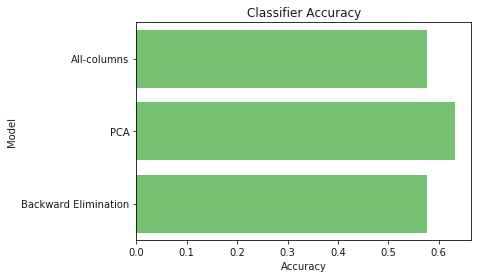

In [25]:
##Visualizing accuracies of different models using barplot
log_cols = ["Model", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

import seaborn as sns

acc_dict = {'All-columns': scores1[0],'Backward Elimination': scores1[1], 'PCA': scores1[2]}

for clf in acc_dict:
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Model', data=log, color="g")

In [26]:
# Applying Random-Forest Classifier

from sklearn.ensemble import RandomForestClassifier
clc = RandomForestClassifier(n_estimators = 10)
clc.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [27]:
# Applying 5-fold cross-validation to X matrix

accuracies = cross_val_score(estimator = clc, X = X, y = y, cv = 5)
scores2.append(accuracies.mean())
accuracies.mean()

0.56237014645722572

In [28]:
# Applying 5-fold cross-validation to X_modeled matrix

accuracies = cross_val_score(estimator = clc, X = X_modeled, y = y, cv = 5)
scores2.append(accuracies.mean())
accuracies.mean()

0.56686355185787152

In [29]:
# Using PCA components
clc1 = RandomForestClassifier(n_estimators = 10)
clc1.fit(X1, y)

accuracies = cross_val_score(estimator = clc1, X = X1, y = y, cv = 5)
scores2.append(accuracies.mean())
accuracies.mean()

0.57577662700597809

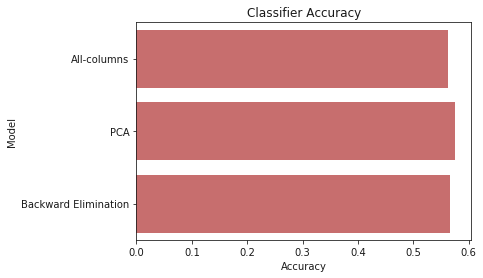

In [30]:
##Visualizing accuracies of different models using barplot
log_cols = ["Model", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

acc_dict = {'All-columns': scores2[0],'Backward Elimination': scores2[1], 'PCA': scores2[2]}

for clf in acc_dict:
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Model', data=log, color="r")

In [31]:
# Applying K-Neighbors Classifier

from sklearn.neighbors import KNeighborsClassifier
clc = KNeighborsClassifier(n_neighbors = 5)
clc.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [32]:
# Applying 5-fold cross-validation to X matrix

accuracies = cross_val_score(estimator = clc, X = X, y = y, cv = 5)
scores3.append(accuracies.mean())
accuracies.mean()

0.55765541649207906

In [33]:
# Applying 5-fold cross-validation to X_modeled matrix

accuracies = cross_val_score(estimator = clc, X = X_modeled, y = y, cv = 5)
scores3.append(accuracies.mean())
accuracies.mean()

0.56299677263974457

In [34]:
# Using PCA components
clc1 = KNeighborsClassifier(n_neighbors = 10)
clc1.fit(X1, y)

accuracies = cross_val_score(estimator = clc1, X = X1, y = y, cv = 5)
scores3.append(accuracies.mean())
accuracies.mean()

0.58247951240831952

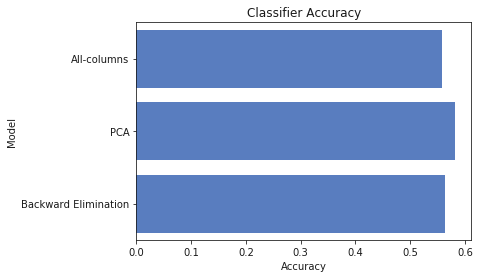

In [35]:
##Visualizing accuracies of different models using barplot
log_cols = ["Model", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

acc_dict = {'All-columns': scores3[0],'Backward Elimination': scores3[1], 'PCA': scores3[2]}

for clf in acc_dict:
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Model', data=log, color="b")

In [36]:
#Importing libraries

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


In [37]:
# Splitting X1 into training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.25, random_state = 42)

In [38]:
# Splitting independent variable into different classes for neural networks

y_train = pd.get_dummies(y_train)

In [39]:
# Applying Artificial Neural Networks

def func():    
    
    clc = None

    #initializing ANN
    clc = Sequential()

    #Adding input layer and 1st hidden layer
    clc.add(Dense(activation="relu", units=300, kernel_initializer="uniform", input_dim=4))

    #Adding 2nd hidden layer
    clc.add(Dense(activation="relu", units=300, kernel_initializer="uniform"))

    #Adding output layer
    clc.add(Dense(activation="softmax", units=4, kernel_initializer="uniform"))

    #Compiling ANN
    clc.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return clc

estimator = KerasClassifier(build_fn = func, epochs = 10, batch_size = 5)


#fitting ANN
estimator.fit(X_train, y_train)



Epoch 1/10
7164/7164 [==============================] - 5s 628us/step - loss: 0.9227 - acc: 0.6414
Epoch 2/10
7164/7164 [==============================] - 4s 603us/step - loss: 0.9012 - acc: 0.6477
Epoch 3/10
7164/7164 [==============================] - 4s 615us/step - loss: 0.8949 - acc: 0.6488
Epoch 4/10
7164/7164 [==============================] - 5s 646us/step - loss: 0.8907 - acc: 0.6482
Epoch 5/10
7164/7164 [==============================] - 4s 557us/step - loss: 0.8893 - acc: 0.6457
Epoch 6/10
7164/7164 [==============================] - 4s 609us/step - loss: 0.8864 - acc: 0.6488
Epoch 7/10
7164/7164 [==============================] - 5s 666us/step - loss: 0.8812 - acc: 0.6510
Epoch 8/10
7164/7164 [==============================] - 5s 639us/step - loss: 0.8769 - acc: 0.6508
Epoch 9/10
7164/7164 [==============================] - 5s 646us/step - loss: 0.8710 - acc: 0.6594
Epoch 10/10
7164/7164 [==============================] - 5s 662us/step - loss: 0.8627 - acc: 0.6594


In [40]:
# Predicting test set results

pred = estimator.predict(X_test)
print(np.unique(pred))

pred1 = pd.DataFrame(pred)
pred1.columns = ['Target']
pred1.head()

[0 1 2 3]


,Target
0,3
1,3
2,3
3,1
4,3


In [41]:
y_test = y_test.reset_index()
y_test.drop('index', axis = 1, inplace = True)
y_test.head()

,Target
0,4
1,4
2,4
3,4
4,4


In [42]:
# Calculating Accuracy
acc = (pred1 == y_test).sum()/len(y_test)
scores4.append(acc[0])

In [43]:
# Splitting X_modeled dataset

X1_train, X1_test, y1_train, y1_test = train_test_split(X_modeled, y, test_size = 0.25, random_state = 42)

In [44]:
# Splitting independent variable into different classes for neural networks

y1_train = pd.get_dummies(y1_train)

In [45]:
# Applying Artificial Neural Networks

def func():    
    
    clc = None

    #initializing ANN
    clc = Sequential()

    #Adding input layer and 1st hidden layer
    clc.add(Dense(activation="relu", units=100, kernel_initializer="uniform", input_dim=X1_train.shape[1]))

    #Adding 2nd hidden layer
    clc.add(Dense(activation="relu", units=100, kernel_initializer="uniform"))

    #Adding output layer
    clc.add(Dense(activation="softmax", units=4, kernel_initializer="uniform"))

    #Compiling ANN
    clc.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return clc

estimator = KerasClassifier(build_fn = func, epochs = 10, batch_size = 5)


#fitting ANN
estimator.fit(X1_train, y1_train)



Epoch 1/10
7164/7164 [==============================] - 3s 472us/step - loss: 0.8631 - acc: 0.6621
Epoch 2/10
7164/7164 [==============================] - 3s 409us/step - loss: 0.7586 - acc: 0.7034
Epoch 3/10
7164/7164 [==============================] - 3s 418us/step - loss: 0.6588 - acc: 0.7545
Epoch 4/10
7164/7164 [==============================] - 3s 432us/step - loss: 0.5567 - acc: 0.7892
Epoch 5/10
7164/7164 [==============================] - 3s 423us/step - loss: 0.4602 - acc: 0.8308
Epoch 6/10
7164/7164 [==============================] - 3s 416us/step - loss: 0.3812 - acc: 0.8592
Epoch 7/10
7164/7164 [==============================] - 3s 368us/step - loss: 0.3249 - acc: 0.8841
Epoch 8/10
7164/7164 [==============================] - 3s 363us/step - loss: 0.2698 - acc: 0.9030
Epoch 9/10
7164/7164 [==============================] - 2s 338us/step - loss: 0.2265 - acc: 0.9200
Epoch 10/10
7164/7164 [==============================] - 3s 360us/step - loss: 0.1907 - acc: 0.9306


In [46]:
# Predicting test set results

pred = estimator.predict(X1_test)
print(np.unique(pred))

pred1 = pd.DataFrame(pred)
pred1.columns = ['Target']
pred1.head()

[0 1 2 3]


,Target
0,3
1,3
2,3
3,3
4,3


In [47]:
# Re-indexing y_test
y1_test = y1_test.reset_index()
y1_test.drop('index', axis = 1, inplace = True)
y1_test.head()

,Target
0,4
1,4
2,4
3,4
4,4


In [48]:
# Calculating Accuracy
acc = (pred1 == y1_test).sum()/len(y1_test)
scores4.append(acc[0])

In [49]:
max(scores3)

0.58247951240831952

In [50]:
## To save score of each model used
log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

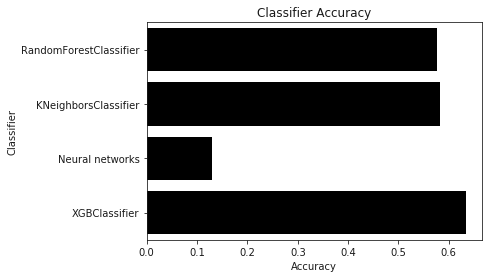

In [51]:
import seaborn as sns

acc_dict = {'KNeighborsClassifier':max(scores3),'RandomForestClassifier': max(scores2), 'XGBClassifier':max(scores1), 'Neural networks':max(scores4)}

for clf in acc_dict:
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="black")

#### XGBoost with 4-components PCA model is the most accurate out of the four classifiers on the household dataset.

### Applying Preprocessing steps to test dataset (for kaggle only)

In [52]:
# Reading test file

df1 = pd.read_csv('test.csv')
df1.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,0,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,1,0,0,0,0,0,0,0,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,16,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,0,0,0,0,0,0,0,1,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,17,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,0,0,0,0,0,0,0,0,1,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,16,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5b598fbc9,0,1,0,1,no,16,no,16.0,0,0,0,0,0,0,0,1,0,1,1.0,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1e2fc704e,1,0,0,1,8,no,11,NaN,0,0,0,0,1,0,0,0,0,2,0.5,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,18,121,324,1,0,1,0.25,64.00,NaN,324


In [53]:
print(df1.columns[df1.dtypes == 'object'])
df1.drop(df1.columns[df1.dtypes == 'object'], axis = 1, inplace = True)

Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')


In [54]:
print(df1.count())
print(df1.columns[df1.count() < 7000])
df1.drop(df1.columns[df1.count() < 7000], axis = 1, inplace = True)

v2a1                6453
hacdor             23856
rooms              23856
hacapo             23856
v14a               23856
refrig             23856
v18q               23856
v18q1               5730
r4h1               23856
r4h2               23856
r4h3               23856
r4m1               23856
r4m2               23856
r4m3               23856
r4t1               23856
r4t2               23856
r4t3               23856
tamhog             23856
tamviv             23856
escolari           23856
rez_esc             4203
hhsize             23856
paredblolad        23856
paredzocalo        23856
paredpreb          23856
pareddes           23856
paredmad           23856
paredzinc          23856
paredfibras        23856
paredother         23856
                   ...  
instlevel9         23856
bedrooms           23856
overcrowding       23856
tipovivi1          23856
tipovivi2          23856
tipovivi3          23856
tipovivi4          23856
tipovivi5          23856
computer           23856


In [55]:
print(df1.isnull().sum().sum())

62


In [56]:
# Replacing Missing values with most frequent values of that columns

from sklearn.preprocessing import Imputer
imp = Imputer(missing_values = 'NaN', strategy = 'most_frequent')
df1 = imp.fit_transform(df1)

In [57]:
np.isnan(df1).sum()

0

In [58]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

df1 = ss.fit_transform(df1)

In [59]:
# Using 4-Component PCA

from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
df1 = pca.fit_transform(df1)
ev = pca.explained_variance_ratio_
ev

array([ 0.10079097,  0.06884233,  0.03809513,  0.03081862])

In [60]:
y_pred = clc1.predict(df1)

In [61]:
# Importing sample_submission file

df2 = pd.read_csv('sample_submission.csv')
df2.head()

,Id,Target
0,ID_2f6873615,4
1,ID_1c78846d2,4
2,ID_e5442cf6a,4
3,ID_a8db26a79,4
4,ID_a62966799,4


In [62]:
df2.drop('Target', axis = 1, inplace = True)

In [63]:
df2.set_index('Id', inplace = True)

In [64]:
df2['Target'] = y_pred
df2.head()

,Target
Id,
ID_2f6873615,4
ID_1c78846d2,4
ID_e5442cf6a,4
ID_a8db26a79,4
ID_a62966799,4


In [65]:
# Writing to My_submission.csv
df2.to_csv('My_submission.csv')